In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('drive/MyDrive/london_df.csv')
data

,Unnamed: 0,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london,stringency,covid
0,0,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Offender sent to prison,Barking and Dagenham,0.000,0
1,1,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Investigation complete; no suspect identified,Barking and Dagenham,0.000,0
2,2,2018-01,Metropolitan Police Service,0.135554,51.584985,On or near Rose Lane,1000027,Barking and Dagenham 001A,Burglary,Status update unavailable,Barking and Dagenham,0.000,0
3,3,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Status update unavailable,Barking and Dagenham,0.000,0
4,4,2018-01,Metropolitan Police Service,0.135554,51.584985,On or near Rose Lane,1000027,Barking and Dagenham 001A,Criminal damage and arson,Investigation complete; no suspect identified,Barking and Dagenham,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844236,2844236,2021-09,Metropolitan Police Service,-0.135532,51.489097,On or near St George'S Square,1004741,Westminster 024F,Theft from the person,Investigation complete; no suspect identified,Westminster,42.034,1
2844237,2844237,2021-09,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,1004741,Westminster 024F,Theft from the person,Under investigation,Westminster,42.034,1
2844238,2844238,2021-09,Metropolitan Police Service,-0.133400,51.489117,On or near Bessborough Street,1004741,Westminster 024F,Violence and sexual offences,Under investigation,Westminster,42.034,1
2844239,2844239,2021-09,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,1004741,Westminster 024F,Violence and sexual offences,Under investigation,Westminster,42.034,1


In [ ]:
data['month'].unique().tolist().index('2018-08')

7

In [ ]:
dates_balanced = data['month'].unique().tolist()[7:]

In [ ]:
def in_dates(item):
    if item in dates_balanced:
        return True
    else: return False

In [ ]:
df_balanced = data[data['month'].apply(in_dates)]
df_balanced

,Unnamed: 0,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london,stringency,covid
9781,9781,2018-08,Metropolitan Police Service,0.133181,51.586719,On or near Rosehatch Avenue,1000027,Barking and Dagenham 001A,Bicycle theft,Investigation complete; no suspect identified,Barking and Dagenham,0.000,0
9782,9782,2018-08,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,1000027,Barking and Dagenham 001A,Burglary,Status update unavailable,Barking and Dagenham,0.000,0
9783,9783,2018-08,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Criminal damage and arson,Investigation complete; no suspect identified,Barking and Dagenham,0.000,0
9784,9784,2018-08,Metropolitan Police Service,0.135866,51.587336,On or near Gibbfield Close,1000027,Barking and Dagenham 001A,Criminal damage and arson,Status update unavailable,Barking and Dagenham,0.000,0
9785,9785,2018-08,Metropolitan Police Service,0.140634,51.583427,On or near Rams Grove,1000027,Barking and Dagenham 001A,Other theft,Status update unavailable,Barking and Dagenham,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844236,2844236,2021-09,Metropolitan Police Service,-0.135532,51.489097,On or near St George'S Square,1004741,Westminster 024F,Theft from the person,Investigation complete; no suspect identified,Westminster,42.034,1
2844237,2844237,2021-09,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,1004741,Westminster 024F,Theft from the person,Under investigation,Westminster,42.034,1
2844238,2844238,2021-09,Metropolitan Police Service,-0.133400,51.489117,On or near Bessborough Street,1004741,Westminster 024F,Violence and sexual offences,Under investigation,Westminster,42.034,1
2844239,2844239,2021-09,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,1004741,Westminster 024F,Violence and sexual offences,Under investigation,Westminster,42.034,1


In [ ]:
df_balanced['month'].unique()

array(['2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01',
       '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07',
       '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01',
       '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
       '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01',
       '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
       '2021-08', '2021-09'], dtype=object)

In [ ]:
df_balanced.to_csv('drive/MyDrive/london_balanced.csv', index = False)

In [ ]:
df_balanced['crime type'].unique()

array(['Bicycle theft', 'Burglary', 'Criminal damage and arson',
       'Other theft', 'Public order', 'Shoplifting', 'Vehicle crime',
       'Violence and sexual offences', 'Robbery', 'Other crime', 'Drugs',
       'Theft from the person', 'Possession of weapons'], dtype=object)

In [ ]:
data.dtypes

crime id                  object
month                     object
reported by               object
longitude                float64
latitude                 float64
location                  object
lsoa code                 object
lsoa name                 object
crime type                object
last outcome category     object
borough_london            object
stringency               float64
dtype: object

In [ ]:
data['crime type'] = data['crime type'].astype('category')

In [ ]:
crime_stringency = df_balanced[['crime type', 'stringency', 'covid']].copy()

In [ ]:
data_encoded = pd.get_dummies(crime_stringency)
data_encoded

,stringency,covid,crime type_Bicycle theft,crime type_Burglary,crime type_Criminal damage and arson,crime type_Drugs,crime type_Other crime,crime type_Other theft,crime type_Possession of weapons,crime type_Public order,crime type_Robbery,crime type_Shoplifting,crime type_Theft from the person,crime type_Vehicle crime,crime type_Violence and sexual offences
9781,0.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9782,0.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9783,0.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9784,0.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9785,0.000,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844236,42.034,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2844237,42.034,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2844238,42.034,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2844239,42.034,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
columns_encoded = data_encoded.columns.to_list()[2:]
columns_encoded

['crime type_Bicycle theft',
 'crime type_Burglary',
 'crime type_Criminal damage and arson',
 'crime type_Drugs',
 'crime type_Other crime',
 'crime type_Other theft',
 'crime type_Possession of weapons',
 'crime type_Public order',
 'crime type_Robbery',
 'crime type_Shoplifting',
 'crime type_Theft from the person',
 'crime type_Vehicle crime',
 'crime type_Violence and sexual offences']

In [ ]:
for value in columns_encoded:
    print(data_encoded[value].value_counts())

0    2774948
1      77911
Name: Bicycle theft, dtype: int64
0    2595712
1     257147
Name: Burglary, dtype: int64
0    2658192
1     194667
Name: Criminal damage and arson, dtype: int64
0    2696184
1     156675
Name: Drugs, dtype: int64
0    2818575
1      34284
Name: Other crime, dtype: int64
0    2472567
1     380292
Name: Other theft, dtype: int64
0    2833504
1      19355
Name: Possession of weapons, dtype: int64
0    2676454
1     176405
Name: Public order, dtype: int64
0    2748146
1     104713
Name: Robbery, dtype: int64
0    2709459
1     143400
Name: Shoplifting, dtype: int64
0    2703675
1     149184
Name: Theft from the person, dtype: int64
0    2447701
1     405158
Name: Vehicle crime, dtype: int64
0    2099191
1     753668
Name: Violence and sexual offences, dtype: int64


In [ ]:
new_columns = []

for column in columns_encoded:
  col = "_".join(column.split())
  new_columns.append(col)
new_columns

['crime_type_Bicycle_theft',
 'crime_type_Burglary',
 'crime_type_Criminal_damage_and_arson',
 'crime_type_Drugs',
 'crime_type_Other_crime',
 'crime_type_Other_theft',
 'crime_type_Possession_of_weapons',
 'crime_type_Public_order',
 'crime_type_Robbery',
 'crime_type_Shoplifting',
 'crime_type_Theft_from_the_person',
 'crime_type_Vehicle_crime',
 'crime_type_Violence_and_sexual_offences']

In [ ]:
old_cols = columns_encoded
rename_cols = zip(old_cols, new_columns)
col_dict = dict(list(rename_cols))

In [ ]:
data_encoded.rename(columns = col_dict, inplace=True )
data_encoded

,stringency,covid,crime_type_Bicycle_theft,crime_type_Burglary,crime_type_Criminal_damage_and_arson,crime_type_Drugs,crime_type_Other_crime,crime_type_Other_theft,crime_type_Possession_of_weapons,crime_type_Public_order,crime_type_Robbery,crime_type_Shoplifting,crime_type_Theft_from_the_person,crime_type_Vehicle_crime,crime_type_Violence_and_sexual_offences
9781,0.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9782,0.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9783,0.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9784,0.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9785,0.000,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844236,42.034,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2844237,42.034,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2844238,42.034,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2844239,42.034,1,0,0,0,0,0,0,0,0,0,0,0,0,1


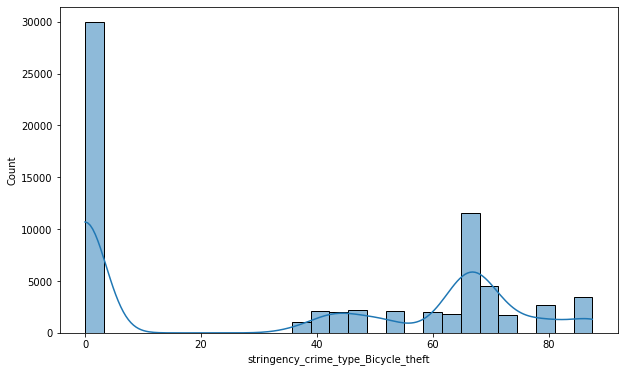

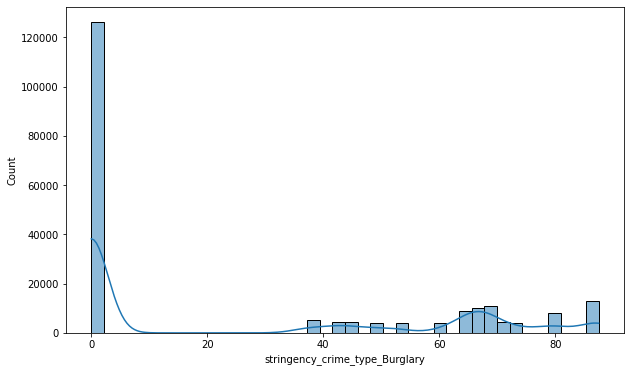

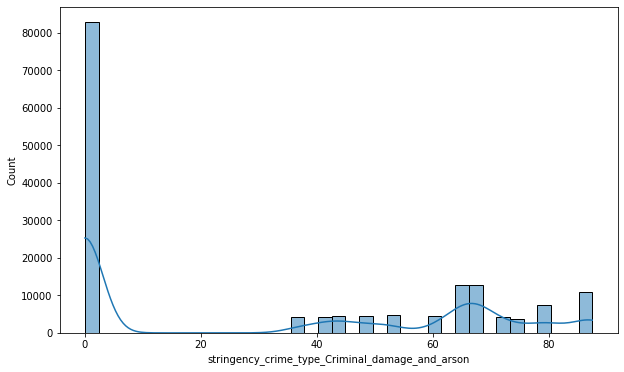

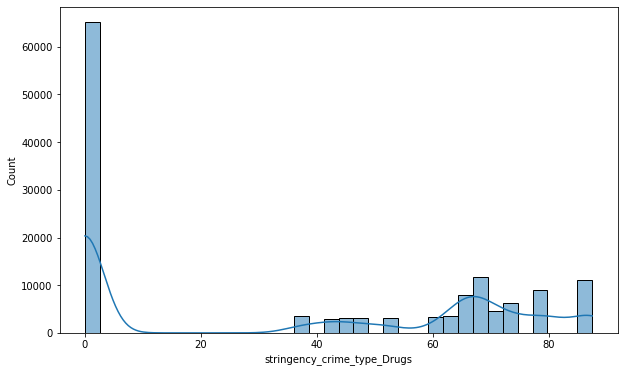

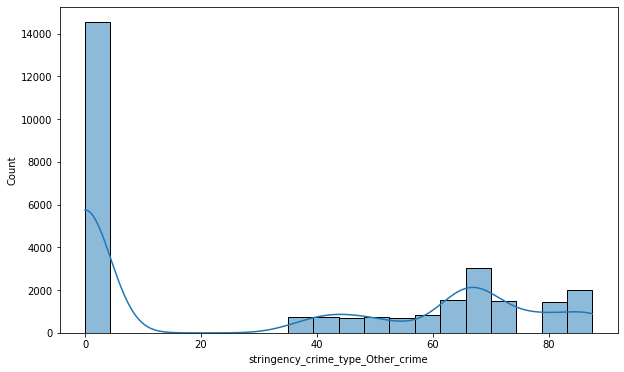

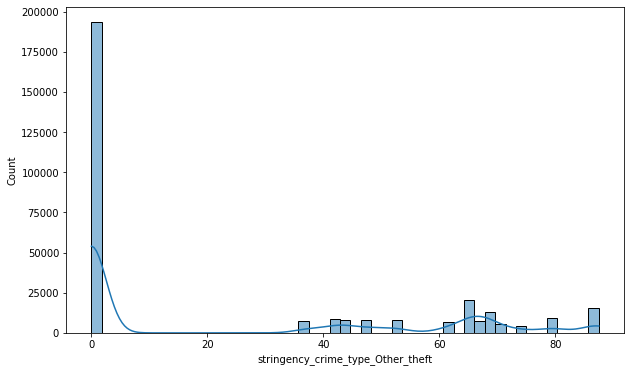

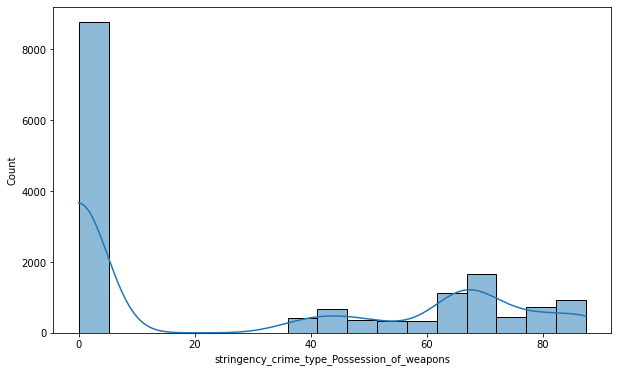

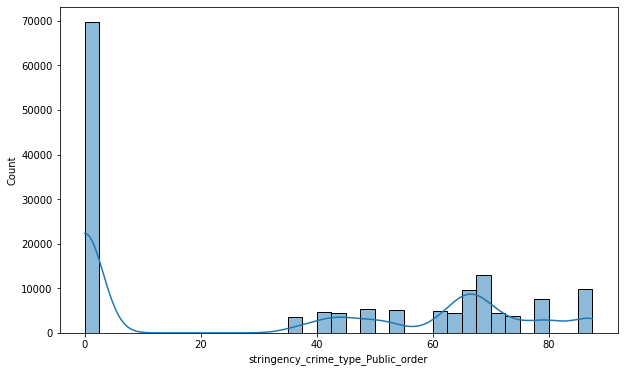

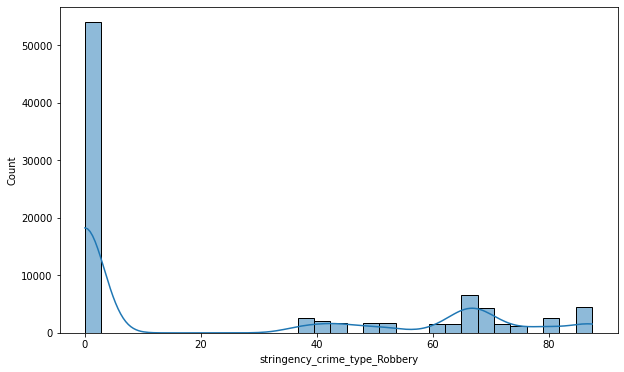

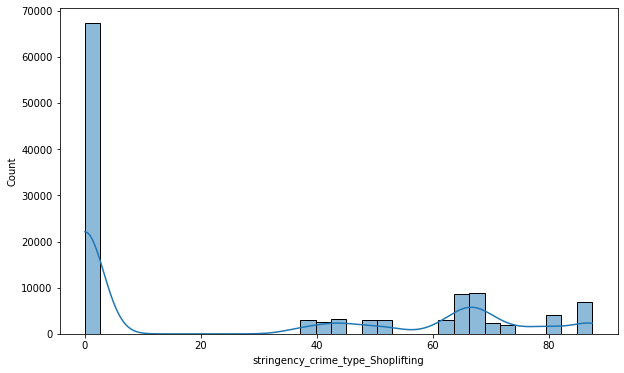

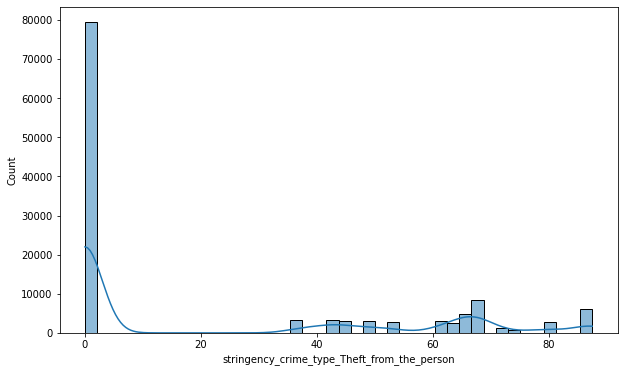

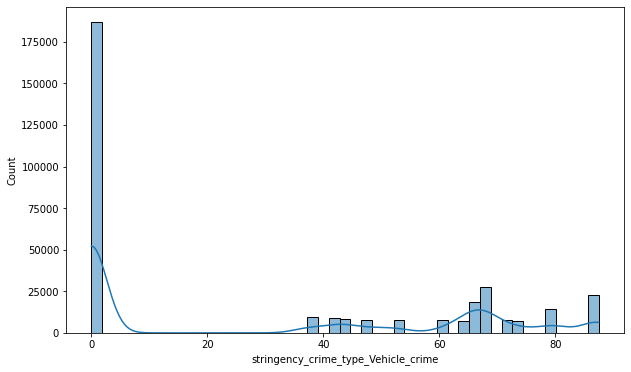

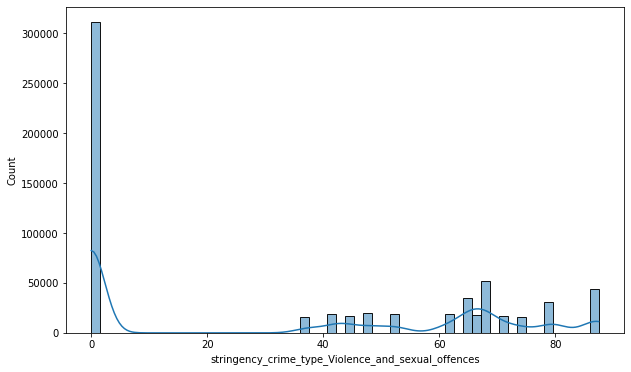

In [ ]:
for col in new_columns:
  feature = data_encoded[data_encoded[f'{col}'] == 1][['stringency', f'{col}']]
  plt.figure(figsize = (10, 6))
  # ax = sns.distplot(feature['stringency'])
  ax = sns.histplot(feature['stringency'], kde=True)
  ax.set(xlabel = f'stringency_{col}')
  
  #Based on the frequency distrbution of crimes by stringency, we can see that stringency 0 dominates the stringency values. 
  #We will first analyze the data with stringency as binary variable (pre- vs pandemic) and then look at the trend during the pandemic only.

In [ ]:
#Analyzing feature importance assuming continuous nature of stringency
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
y =  data_encoded['stringency']
X = data_encoded.drop(['stringency', 'covid'], axis = 1)
X

,crime_type_Bicycle_theft,crime_type_Burglary,crime_type_Criminal_damage_and_arson,crime_type_Drugs,crime_type_Other_crime,crime_type_Other_theft,crime_type_Possession_of_weapons,crime_type_Public_order,crime_type_Robbery,crime_type_Shoplifting,crime_type_Theft_from_the_person,crime_type_Vehicle_crime,crime_type_Violence_and_sexual_offences
9781,1,0,0,0,0,0,0,0,0,0,0,0,0
9782,0,1,0,0,0,0,0,0,0,0,0,0,0
9783,0,0,1,0,0,0,0,0,0,0,0,0,0
9784,0,0,1,0,0,0,0,0,0,0,0,0,0
9785,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844236,0,0,0,0,0,0,0,0,0,0,1,0,0
2844237,0,0,0,0,0,0,0,0,0,0,1,0,0
2844238,0,0,0,0,0,0,0,0,0,0,0,0,1
2844239,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
array_y = y.values
y.values

array([ 0.   ,  0.   ,  0.   , ..., 42.034, 42.034, 42.034])

In [ ]:
array_X = X.values[:,0:len(X)]
array_X

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [ ]:
test = SelectKBest(score_func=f_classif, k='all')
fit = test.fit(array_X, array_y)

In [ ]:
set_printoptions(precision=3)
print(fit.scores_)
print(fit.pvalues_)

[299.967 218.137  36.65  530.492  12.664 570.936   9.608 262.643 162.84
  49.269 442.166  67.765 494.471]
[0.000e+000 0.000e+000 2.081e-128 0.000e+000 2.421e-038 0.000e+000
 2.378e-027 0.000e+000 0.000e+000 1.087e-176 0.000e+000 7.563e-248
 0.000e+000]


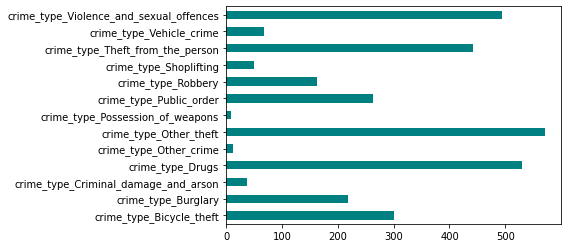

In [ ]:
feature_scores_plot = pd.Series(fit.scores_, new_columns)
feature_scores_plot.plot(kind = 'barh', color = 'teal')
plt.show()
#seven features stand out in terms of their scores

In [ ]:
k_best_scores = np.sort(fit.scores_)[-7:]
k_best_scores

array([218.137, 262.643, 299.967, 442.166, 494.471, 530.492, 570.936])

In [ ]:
dtype = [('score', float), ('column', 'S50')]
score_feature = zip(fit.scores_, new_columns)
score_feature_list = list(score_feature)
score_feature_array = np.array(score_feature_list, dtype = dtype)
k_best = np.sort(score_feature_array, order=['score', 'column'])
k_best = np.sort(score_feature_array)[-7:]
k_best
#.decode('ascii')

array([(218.137, b'crime_type_Burglary'),
       (262.643, b'crime_type_Public_order'),
       (299.967, b'crime_type_Bicycle_theft'),
       (442.166, b'crime_type_Theft_from_the_person'),
       (494.471, b'crime_type_Violence_and_sexual_offences'),
       (530.492, b'crime_type_Drugs'),
       (570.936, b'crime_type_Other_theft')],
      dtype=[('score', '<f8'), ('column', 'S50')])

In [ ]:
# features = fit.transform(array_X)
# # summarize selected features
# print(features[0:14,:])

[[0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [1 0 0 0 0 0]]


In [ ]:
# def stringency_bi(item):
#     if item == 0:
#         return 0
#     else:
#         return 1

In [ ]:
# data_encoded['stringency_bi'] = data_encoded['stringency'].apply(stringency_bi)
# data_encoded

,stringency,crime_type_Bicycle_theft,crime_type_Burglary,crime_type_Criminal_damage_and_arson,crime_type_Drugs,crime_type_Other_crime,crime_type_Other_theft,crime_type_Possession_of_weapons,crime_type_Public_order,crime_type_Robbery,crime_type_Shoplifting,crime_type_Theft_from_the_person,crime_type_Vehicle_crime,crime_type_Violence_and_sexual_offences,stringency_bi
449848,0.000,0,0,0,0,0,1,0,0,0,0,0,0,0,0
449849,0.000,0,0,0,0,0,1,0,0,0,0,0,0,0,0
449850,0.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0
449851,0.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0
449852,0.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852854,42.034,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2852855,42.034,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2852856,42.034,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2852857,42.034,0,0,0,0,0,0,0,0,0,0,0,0,1,1


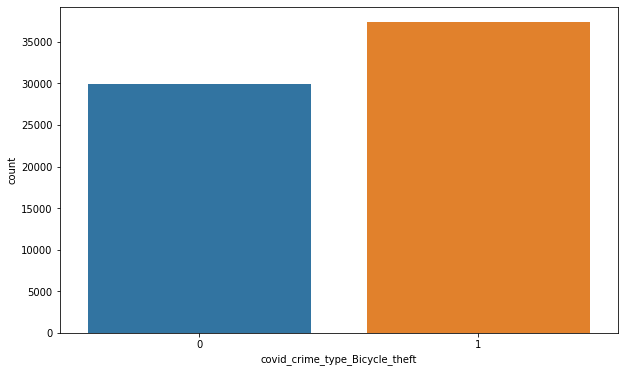

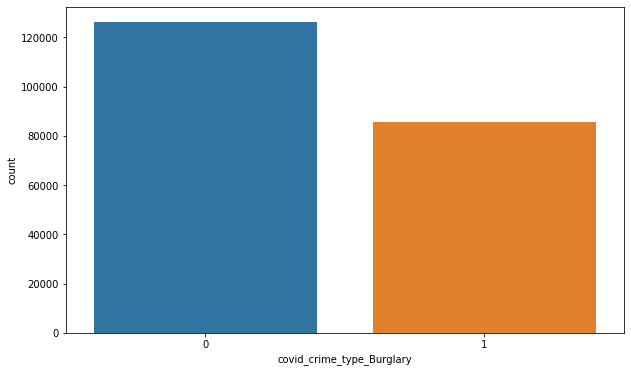

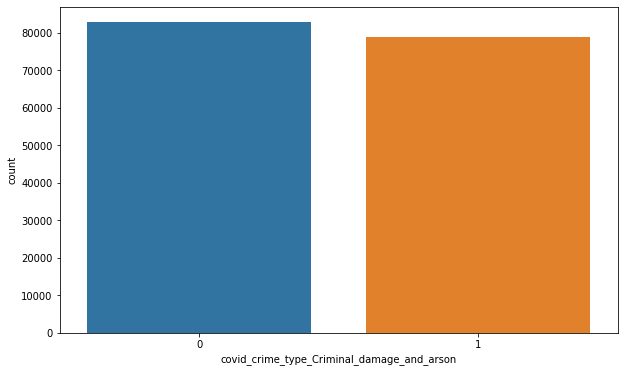

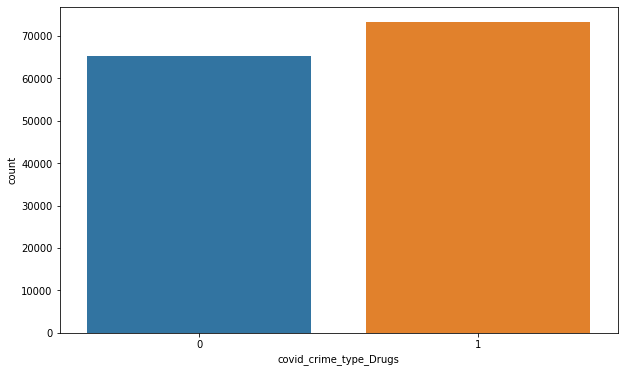

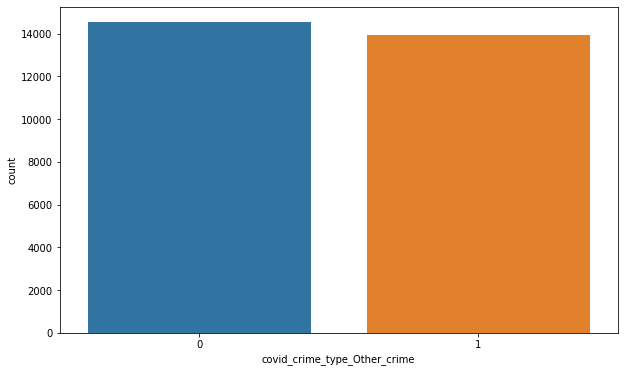

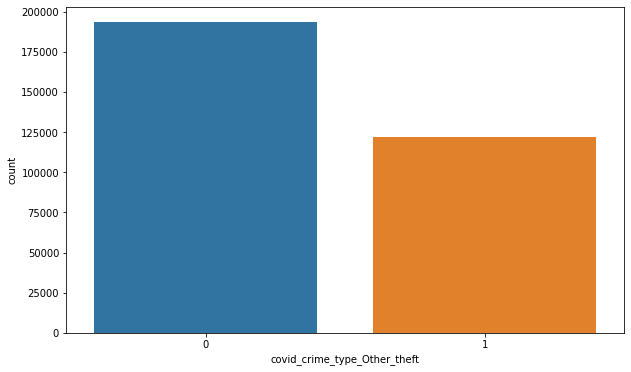

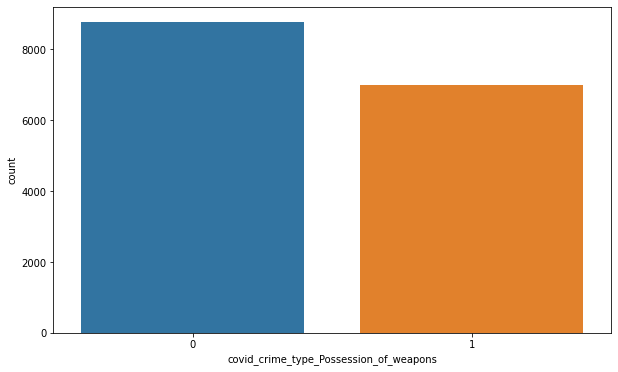

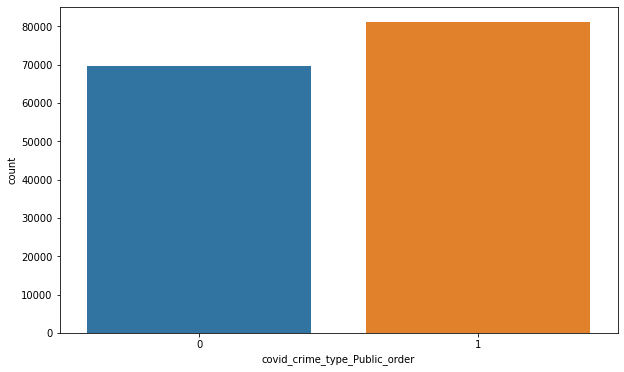

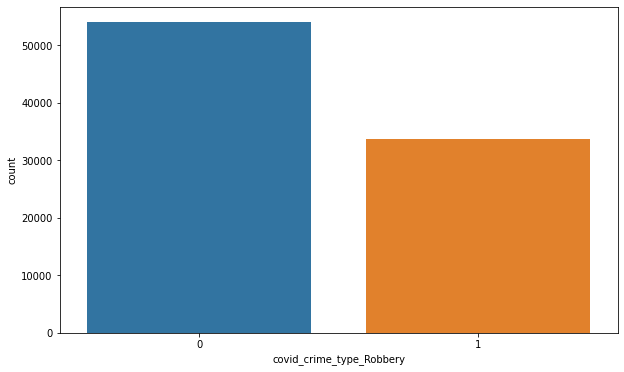

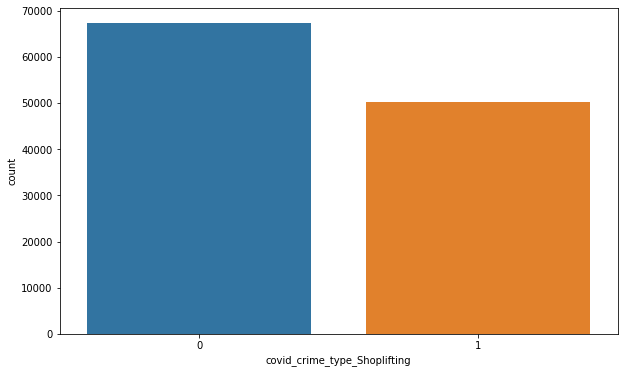

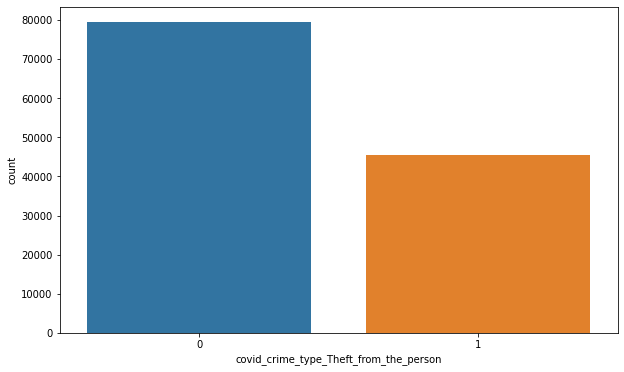

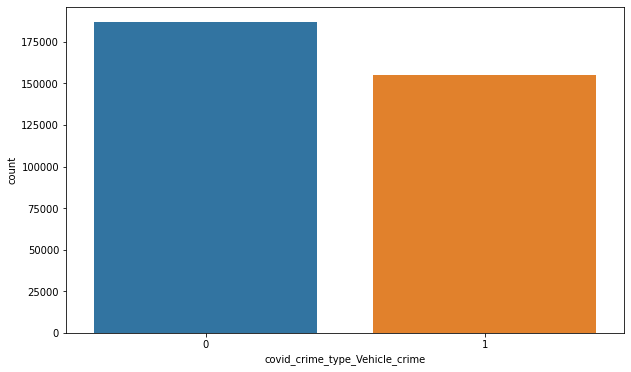

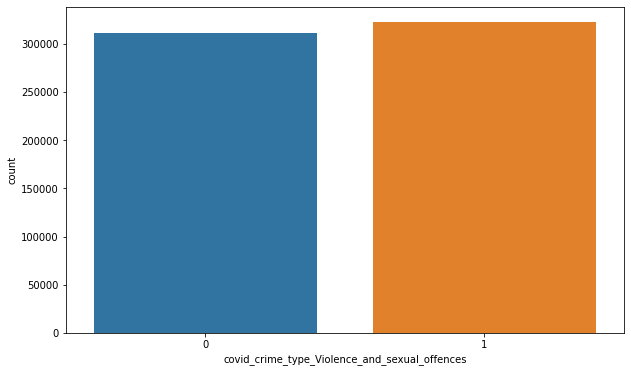

In [ ]:
for col in new_columns:
  feature = data_encoded[data_encoded[f'{col}'] == 1][['covid', f'{col}']]
  plt.figure(figsize = (10, 6))
  # ax = sns.distplot(feature['stringency'])
  ax = sns.countplot(x = feature['covid'])
  ax.set(xlabel = f'covid_{col}')

In [ ]:
print(feature)

         covid  crime_type_Violence_and_sexual_offences
9793         0                                        1
9794         0                                        1
9795         0                                        1
9796         0                                        1
9797         0                                        1
...        ...                                      ...
2844227      1                                        1
2844228      1                                        1
2844238      1                                        1
2844239      1                                        1
2844240      1                                        1

[633456 rows x 2 columns]


In [90]:
from sklearn.feature_selection import chi2

In [91]:
y_2 =  data_encoded['covid']
X_2 = data_encoded.drop(['stringency', 'covid'], axis = 1)

In [92]:


test_2 = SelectKBest(score_func=chi2, k='all')
fit_2 = test_2.fit(X_2, y_2)
fit_2.scores_

array([2346.157, 2834.705,  440.996, 2518.264,   86.76 , 7067.647,
         21.2  , 3485.18 , 2122.031,  563.729, 4766.5  ,   82.406,
       5610.753])

In [93]:
fit_2.pvalues_

array([0.000e+000, 0.000e+000, 6.572e-098, 0.000e+000, 1.225e-020,
       0.000e+000, 4.137e-006, 0.000e+000, 0.000e+000, 1.299e-124,
       0.000e+000, 1.108e-019, 0.000e+000])

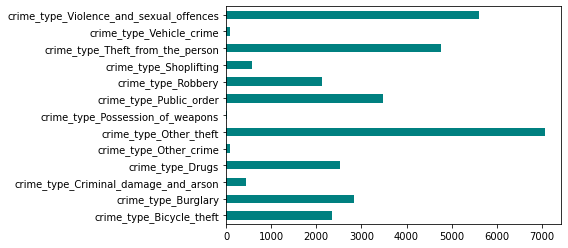

In [94]:
feature_scores_plot = pd.Series(fit_2.scores_, new_columns)
feature_scores_plot.plot(kind = 'barh', color = 'teal')
plt.show()

In [95]:
k_best_scores_2 = np.sort(fit_2.scores_)[-7:]
k_best_scores_2

array([2346.157, 2518.264, 2834.705, 3485.18 , 4766.5  , 5610.753,
       7067.647])

In [96]:
dtype = [('score', float), ('column', 'S50')]
score_feature_2 = zip(fit_2.scores_, new_columns)
score_feature_list_2 = list(score_feature_2)
score_feature_array_2 = np.array(score_feature_list_2, dtype = dtype)
score_sorted_2 = np.sort(score_feature_array_2, order=['score', 'column'])
k_best_2 = score_sorted_2[-7:]
k_best_2
#.decode('ascii')

array([(2346.157, b'crime_type_Bicycle_theft'),
       (2518.264, b'crime_type_Drugs'),
       (2834.705, b'crime_type_Burglary'),
       (3485.18 , b'crime_type_Public_order'),
       (4766.5  , b'crime_type_Theft_from_the_person'),
       (5610.753, b'crime_type_Violence_and_sexual_offences'),
       (7067.647, b'crime_type_Other_theft')],
      dtype=[('score', '<f8'), ('column', 'S50')])

In [121]:
#########logistic regression on crime types and covid variable, created from a binarized stringency
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.2, random_state=5)

In [122]:
X_train.shape

(1916132, 13)

In [123]:
from sklearn.linear_model import LogisticRegression

# Let's compute the logistic regression
# Initiate your logistic model
logit = LogisticRegression()
# Fit your logistic regression model to your train model
logit.fit(X_train, y_train)

LogisticRegression()

In [124]:
logit.coef_.shape

(1, 13)

In [125]:
# Predict labels on your Test set of independent variables
#will this row be in 50k or under 50k category
pred_logit = logit.predict(X_test)

# Predict probabilities on your Test set of independent variables
#this will give us probabilities, how confident we are in those answears
proba_logit = logit.predict_proba(X_test)

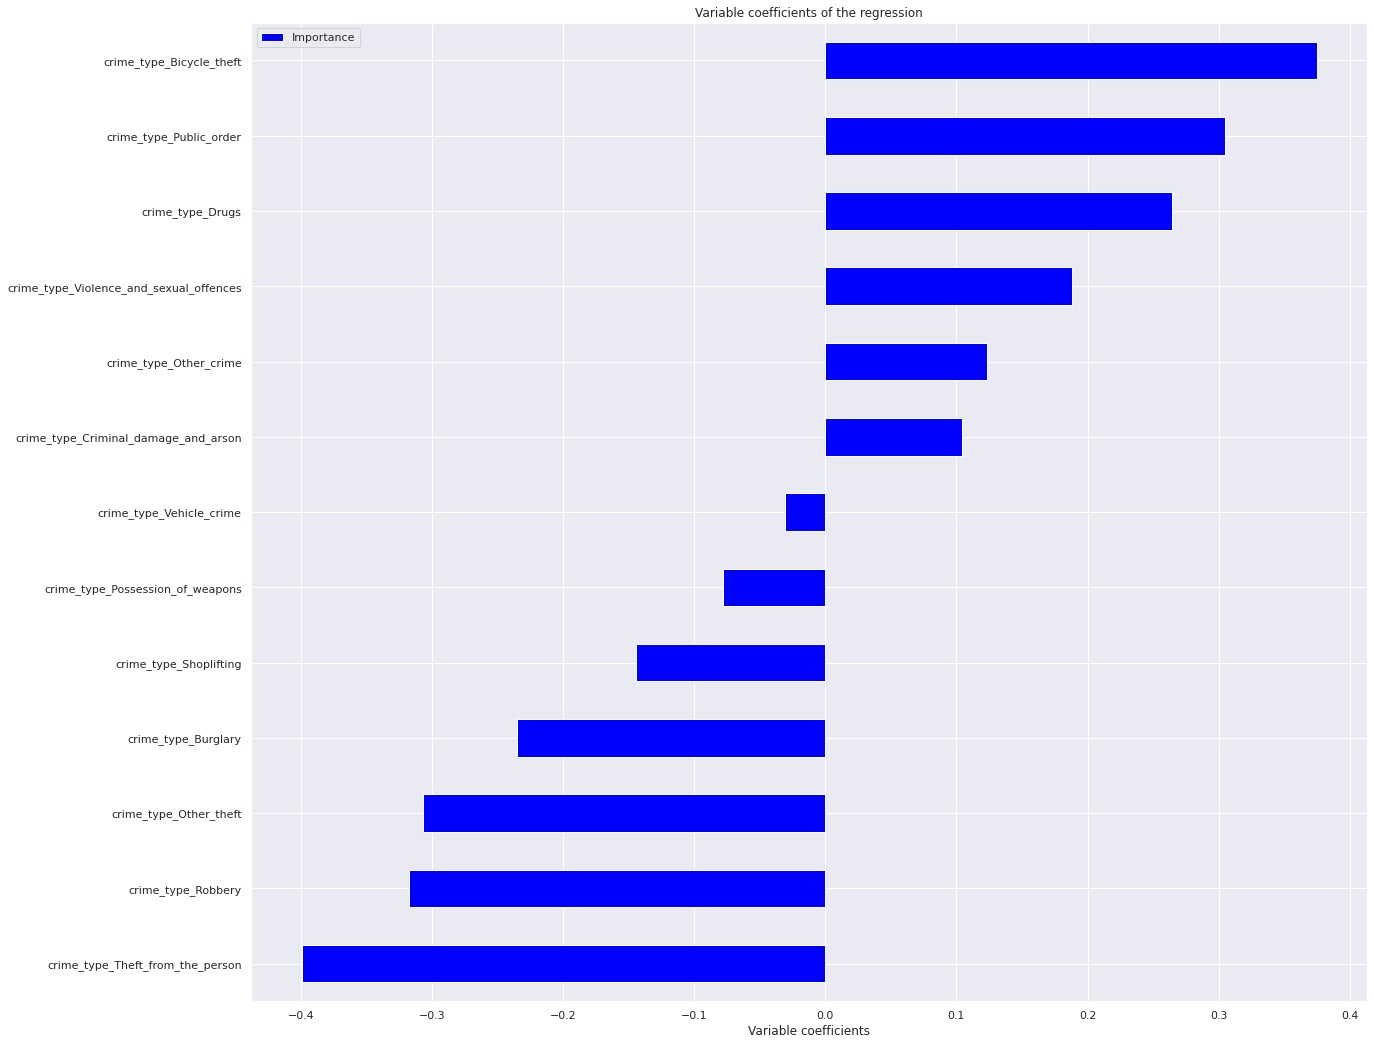

In [126]:
# Plot feature importance
coefs = pd.DataFrame(logit.coef_.reshape((13, 1)), 
                         index = X_train.columns.tolist(), columns = ['Importance'])

coefs = coefs.sort_values(by='Importance', ascending=True)
coefs.plot(kind='barh', figsize=(20,18), color = 'blue')
plt.xlabel('Variable coefficients')
plt.title('Variable coefficients of the regression')
plt.show()

In [127]:
###Logisitic regression - model evaluation

#### Import core python libraries
import pickle
import os
from IPython.display import Math
from itertools import product

#### Import machine learning and stats libraries
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (auc, confusion_matrix, roc_curve, 
                             accuracy_score, precision_score, recall_score)

##### Import visualisation libraries
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 12
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [128]:
thres = 0.5
target_predict_logit = np.where(proba_logit[:,1] > thres, 1, 0)
target_actual = y_test

In [129]:
# How many actual "positive" (e.g., >50k) cases do we have in our train/test dataset? 

# What % of each dataset does it make up?

train_pos_count = y_train.sum()
test_pos_count = y_test.sum()

print('% positive in train set (count/total): {:.2f}% ({}/{})'
      .format(train_pos_count * 100.0 / len(y_train), train_pos_count, len(y_train)))
print('% positive in test set (count/total): {:.2f}% ({}/{})'
      .format(test_pos_count * 100.0 / len(y_test), test_pos_count, len(y_test)))

% positive in train set (count/total): 46.18% (884884/1916132)
% positive in test set (count/total): 46.19% (221289/479034)


In [130]:
# How many "positive" (e.g., >50k) cases do we predict with the logistic regression?

logit_pos_count = target_predict_logit.sum()
print('% positive in logistic predictions (count/total): {:.2f}% ({}/{})'
      .format(logit_pos_count * 100.0 / len(y_test), logit_pos_count, len(y_test)))

% positive in logistic predictions (count/total): 41.34% (198019/479034)


In [131]:
# This is a function to 'prettify' confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          axis=1,
                          figsize=(5,4), 
                          fontsize=14,
                          cmap='Blues'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Note that normalization here by default occurs across axis=1, or across each row (true class). 
    """
    
    if normalize:
        if axis == 1:
            cm = cm.astype('float') / cm.sum(axis=axis)[:, np.newaxis] * 100
        elif axis == 0:
            cm = cm.astype('float') / cm.sum(axis=axis)[np.newaxis, :] * 100
        else:
            raise ValueError("axis must be 0 or 1")
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig = plt.figure(figsize=figsize)
    plt.grid(b=None)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    q_labels = ['TN', 'FP', 'FN', 'TP']
    quad_font_size = 14
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    q_i = 0
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        
        q = plt.text(j, i-0.2, q_labels[q_i], horizontalalignment='center', fontsize=quad_font_size)
        q_i += 1
        q.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='white'))
        
        t = plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                     verticalalignment="center",
                 color="#002781",
                    fontsize=fontsize)
        t.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='white'))
        

    plt.tight_layout(h_pad=10, w_pad=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return None

Confusion matrix, without normalization
[[162587  95158]
 [118428 102861]]
Normalized confusion matrix
[[63.081 36.919]
 [53.517 46.483]]


<Figure size 432x288 with 0 Axes>

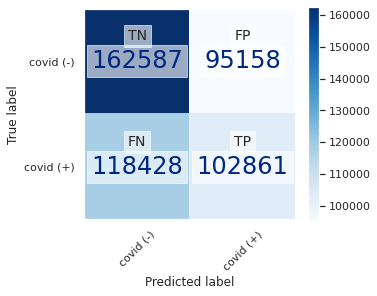

<Figure size 432x288 with 0 Axes>

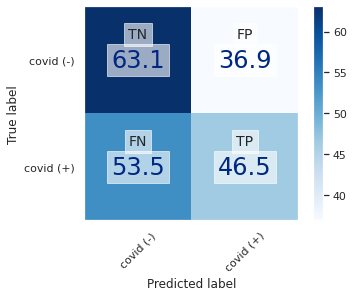

<Figure size 432x288 with 0 Axes>

In [132]:
class_names = ['covid (-)', 'covid (+)']
fontsize=24
figsize=(5,4)

# Plot the confusion matrix of the logistic regression
logit_cfn = confusion_matrix(target_actual, target_predict_logit)
log_tn, log_fn, log_fp, log_tp = confusion_matrix(target_actual, target_predict_logit).ravel()


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(logit_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(logit_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

plt.show()
plt.tight_layout()

In [133]:
print("Accuracy:", accuracy_score(y_test, pred_logit))
print("Precision:", precision_score(y_test, pred_logit))
print("Recall:", recall_score(y_test, pred_logit))

Accuracy: 0.5541318570289374
Precision: 0.5194501537731228
Recall: 0.4648265390507436


In [136]:
##########Logistic regression with k-best features
k_features_values = dict(k_best_2).values()
k_features = []
for value in k_features_values:
  k_features.append(value.decode('ascii'))
k_features

['crime_type_Bicycle_theft',
 'crime_type_Drugs',
 'crime_type_Burglary',
 'crime_type_Public_order',
 'crime_type_Theft_from_the_person',
 'crime_type_Violence_and_sexual_offences',
 'crime_type_Other_theft']

In [138]:
y_3 =  data_encoded['covid']
X_3 = data_encoded[k_features]

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size = 0.2, random_state=5)

In [140]:
X_train.shape

(1916132, 7)

In [141]:
from sklearn.linear_model import LogisticRegression

# Let's compute the logistic regression
# Initiate your logistic model
logit = LogisticRegression()
# Fit your logistic regression model to your train model
logit.fit(X_train, y_train)

LogisticRegression()

In [142]:
logit.coef_.shape

(1, 7)

In [144]:
# Predict labels on your Test set of independent variables
#will this row be in 50k or under 50k category
pred_logit = logit.predict(X_test)

# Predict probabilities on your Test set of independent variables
#this will give us probabilities, how confident we are in those answears
proba_logit = logit.predict_proba(X_test)

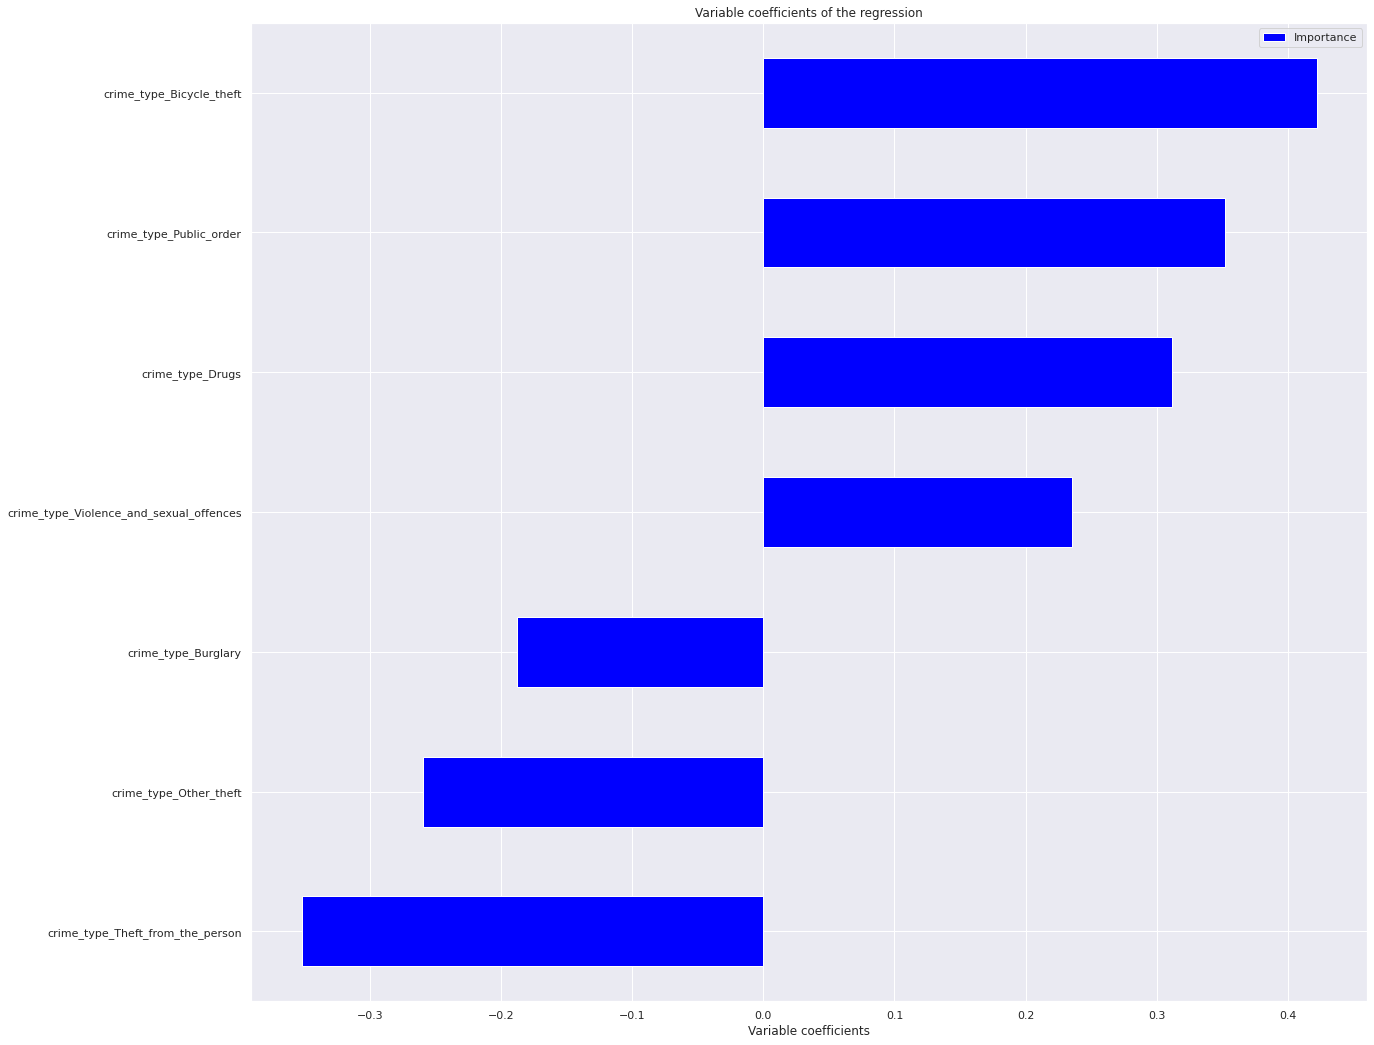

In [145]:
# Plot feature importance
coefs = pd.DataFrame(logit.coef_.reshape((7, 1)), 
                         index = X_train.columns.tolist(), columns = ['Importance'])

coefs = coefs.sort_values(by='Importance', ascending=True)
coefs.plot(kind='barh', figsize=(20,18), color = 'blue')
plt.xlabel('Variable coefficients')
plt.title('Variable coefficients of the regression')
plt.show()

In [146]:
#### Import core python libraries
import pickle
import os
from IPython.display import Math
from itertools import product

#### Import machine learning and stats libraries
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (auc, confusion_matrix, roc_curve, roc_auc_score,
                             accuracy_score, precision_score, recall_score)

##### Import visualisation libraries
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 12
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [147]:
thres = 0.5
target_predict_logit = np.where(proba_logit[:,1] > thres, 1, 0)
target_actual = y_test

In [148]:
# How many actual "positive" (e.g., >50k) cases do we have in our train/test dataset? 

# What % of each dataset does it make up?

train_pos_count = y_train.sum()
test_pos_count = y_test.sum()

print('% positive in train set (count/total): {:.2f}% ({}/{})'
      .format(train_pos_count * 100.0 / len(y_train), train_pos_count, len(y_train)))
print('% positive in test set (count/total): {:.2f}% ({}/{})'
      .format(test_pos_count * 100.0 / len(y_test), test_pos_count, len(y_test)))

% positive in train set (count/total): 46.18% (884884/1916132)
% positive in test set (count/total): 46.19% (221289/479034)


In [149]:
# How many "positive" (e.g., >50k) cases do we predict with the logistic regression?

logit_pos_count = target_predict_logit.sum()
print('% positive in logistic predictions (count/total): {:.2f}% ({}/{})'
      .format(logit_pos_count * 100.0 / len(y_test), logit_pos_count, len(y_test)))

% positive in logistic predictions (count/total): 41.34% (198019/479034)


In [150]:
# This is a function to 'prettify' confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          axis=1,
                          figsize=(5,4), 
                          fontsize=14,
                          cmap='Blues'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Note that normalization here by default occurs across axis=1, or across each row (true class). 
    """
    
    if normalize:
        if axis == 1:
            cm = cm.astype('float') / cm.sum(axis=axis)[:, np.newaxis] * 100
        elif axis == 0:
            cm = cm.astype('float') / cm.sum(axis=axis)[np.newaxis, :] * 100
        else:
            raise ValueError("axis must be 0 or 1")
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig = plt.figure(figsize=figsize)
    plt.grid(b=None)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    q_labels = ['TN', 'FP', 'FN', 'TP']
    quad_font_size = 14
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    q_i = 0
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        
        q = plt.text(j, i-0.2, q_labels[q_i], horizontalalignment='center', fontsize=quad_font_size)
        q_i += 1
        q.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='white'))
        
        t = plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                     verticalalignment="center",
                 color="#002781",
                    fontsize=fontsize)
        t.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='white'))
        

    plt.tight_layout(h_pad=10, w_pad=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return None

Confusion matrix, without normalization
[[162587  95158]
 [118428 102861]]
Normalized confusion matrix
[[63.081 36.919]
 [53.517 46.483]]


<Figure size 432x288 with 0 Axes>

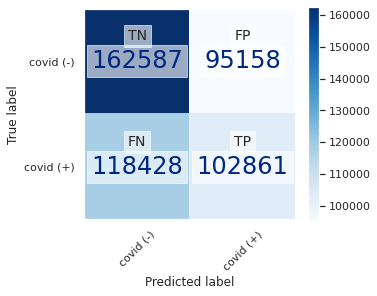

<Figure size 432x288 with 0 Axes>

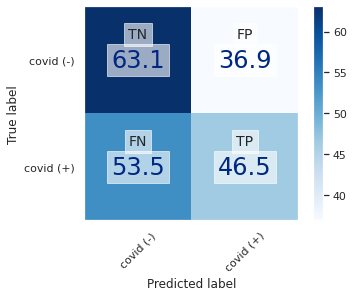

<Figure size 432x288 with 0 Axes>

In [151]:
class_names = ['covid (-)', 'covid (+)']
fontsize=24
figsize=(5,4)

# Plot the confusion matrix of the logistic regression
logit_cfn = confusion_matrix(target_actual, target_predict_logit)
log_tn, log_fn, log_fp, log_tp = confusion_matrix(target_actual, target_predict_logit).ravel()


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(logit_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(logit_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

plt.show()
plt.tight_layout()

In [152]:
print("Accuracy:", accuracy_score(y_test, pred_logit))
print("Precision:", precision_score(y_test, pred_logit))
print("Recall:", recall_score(y_test, pred_logit))

####Removing less important features did not improve the evalution metrics, but also did not compromise our model, 
#####therefore we will adopt the simpler model as less important variables were redundant

Accuracy: 0.5541318570289374
Precision: 0.5194501537731228
Recall: 0.4648265390507436


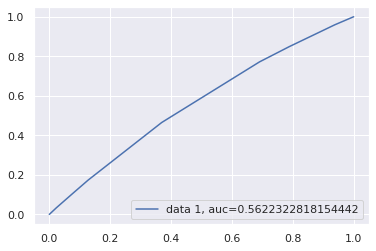

In [153]:
y_pred_proba = logit.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

######Conclusion - our model does not significantly predict above chance level, 
####this is due to high variablity of crime levels within the category 1 of covid variable

In [ ]:
#### We will now focus on the pandemic period to see if stringency of covid measures as a continuous variable 
####is related to crime types

In [161]:
data_encoded_dates = pd.concat((df_balanced['month'], data_encoded), axis = 1)

In [162]:
data_encoded_dates 

,month,stringency,covid,crime_type_Bicycle_theft,crime_type_Burglary,crime_type_Criminal_damage_and_arson,crime_type_Drugs,crime_type_Other_crime,crime_type_Other_theft,crime_type_Possession_of_weapons,crime_type_Public_order,crime_type_Robbery,crime_type_Shoplifting,crime_type_Theft_from_the_person,crime_type_Vehicle_crime,crime_type_Violence_and_sexual_offences
9781,2018-08,0.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9782,2018-08,0.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9783,2018-08,0.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9784,2018-08,0.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9785,2018-08,0.000,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844236,2021-09,42.034,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2844237,2021-09,42.034,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2844238,2021-09,42.034,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2844239,2021-09,42.034,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [163]:
london_pandemic = data_encoded_dates[data_encoded['stringency'] > 0]
london_pandemic['stringency'].value_counts()

86.885161    103080
67.560333     64580
65.611379     64442
67.901333     64270
48.179000     63982
42.034000     63895
65.184000     63679
52.539310     63247
61.156333     61347
43.980000     60967
37.484000     60812
68.100690     59213
79.536000     56772
70.978966     56526
64.303103     55805
74.045000     51756
87.480370     47535
79.630000     44265
Name: stringency, dtype: int64

In [164]:
london_pandemic.groupby('month')['stringency'].mean()

month
2020-03    37.484000
2020-04    79.630000
2020-05    74.045000
2020-06    70.978966
2020-07    65.184000
2020-08    67.560333
2020-09    65.611379
2020-10    67.901333
2020-11    68.100690
2020-12    86.885161
2021-01    86.885161
2021-02    87.480370
2021-03    79.536000
2021-04    64.303103
2021-05    61.156333
2021-06    52.539310
2021-07    48.179000
2021-08    43.980000
2021-09    42.034000
Name: stringency, dtype: float64

In [170]:
crimes_by_stringency_by_month = london_pandemic.groupby('month')['stringency'].value_counts()
crimes_by_stringency_by_month

month    stringency
2020-03  37.484000     60812
2020-04  79.630000     44265
2020-05  74.045000     51756
2020-06  70.978966     56526
2020-07  65.184000     63679
2020-08  67.560333     64580
2020-09  65.611379     64442
2020-10  67.901333     64270
2020-11  68.100690     59213
2020-12  86.885161     55122
2021-01  86.885161     47958
2021-02  87.480370     47535
2021-03  79.536000     56772
2021-04  64.303103     55805
2021-05  61.156333     61347
2021-06  52.539310     63247
2021-07  48.179000     63982
2021-08  43.980000     60967
2021-09  42.034000     63895
Name: stringency, dtype: int64

In [222]:
crimes_stringency_month_df = crimes_by_stringency_by_month.sort_index(level=[1, 0]).to_frame()
crimes_stringency_month_df

,,stringency
month,stringency,
2020-03,37.484000,60812
2021-09,42.034000,63895
2021-08,43.980000,60967
2021-07,48.179000,63982
2021-06,52.539310,63247
2021-05,61.156333,61347
2021-04,64.303103,55805
2020-07,65.184000,63679
2020-09,65.611379,64442


In [223]:
crimes_stringency_month_df.rename({'stringency': 'crime_count'}, axis = 1, inplace = True)
crimes_stringency_month_df.reset_index(level='stringency', inplace = True)

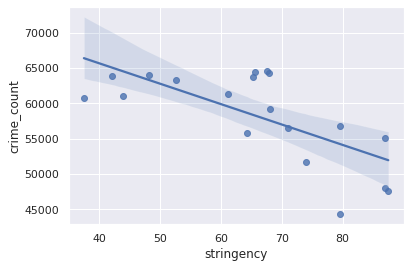

In [230]:
sns.regplot(data = crimes_stringency_month_df, x = crimes_stringency_month_df['stringency'], y = crimes_stringency_month_df['crime_count'])

In [ ]:
london_pandemic.groupby('month')[['stringency', 'crime_type_Drugs']].value_counts()

In [ ]:
for col in new_columns:
  feature = data_encoded[data_encoded[f'{col}'] == 1][['stringency', f'{col}']]
  plt.figure(figsize = (10, 6))
  # ax = sns.distplot(feature['stringency'])
  ax = sns.histplot(feature['stringency'], kde=True)
  ax.set(xlabel = f'stringency_{col}')

In [219]:
crime_df = london_pandemic[london_pandemic['crime_type_Drugs'] == 1].groupby('month')['stringency'].value_counts().sort_index(level=[1, 0]).to_frame()

In [220]:
crime_df.rename({'stringency': 'crime_count'}, axis = 1, inplace = True)
crime_df.reset_index(level='stringency', inplace = True)

In [221]:
crime_df

,stringency,crime_count
month,,
2020-03,37.484000,3580
2021-09,42.034000,2884
2021-08,43.980000,3099
2021-07,48.179000,3177
2021-06,52.539310,3135
2021-05,61.156333,3331
2021-04,64.303103,3647
2020-07,65.184000,4422
2020-09,65.611379,3425


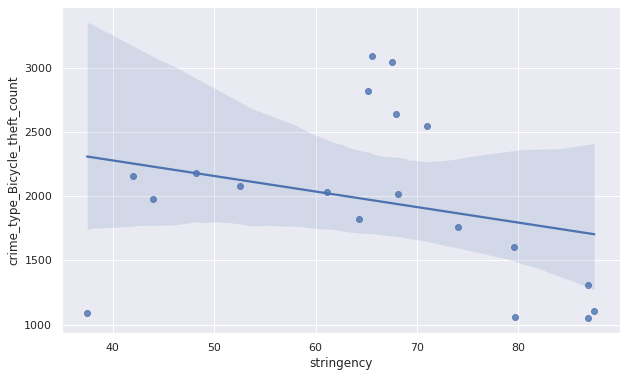

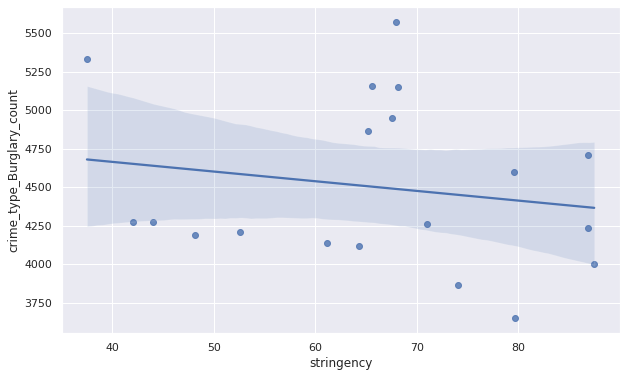

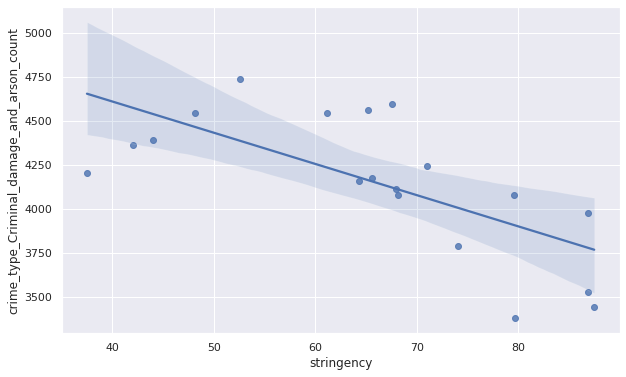

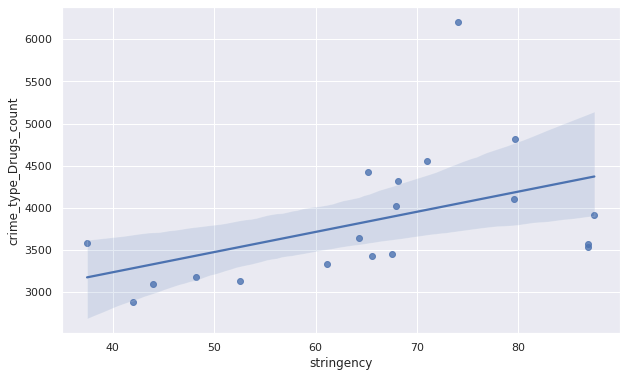

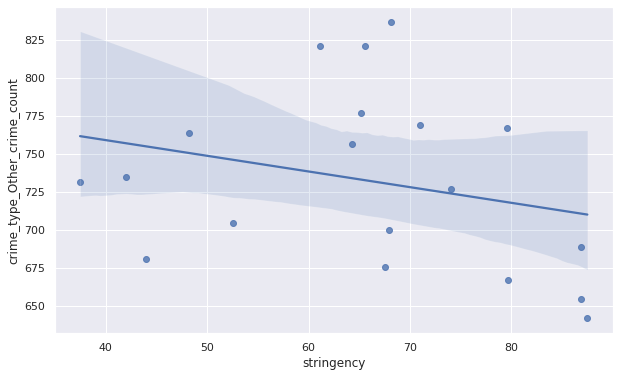

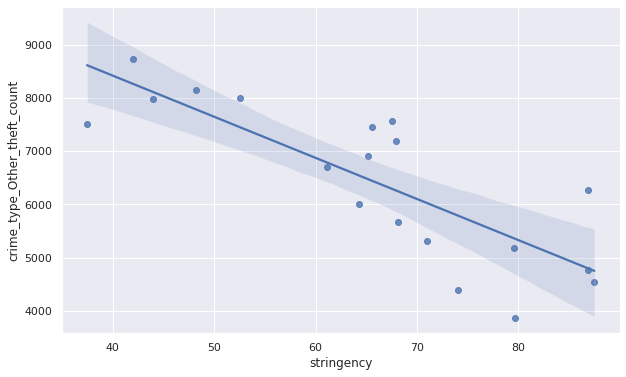

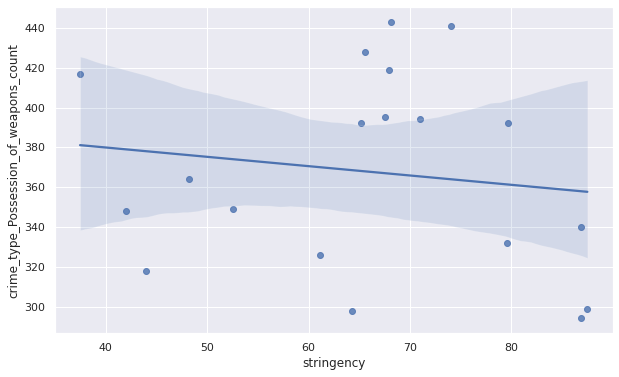

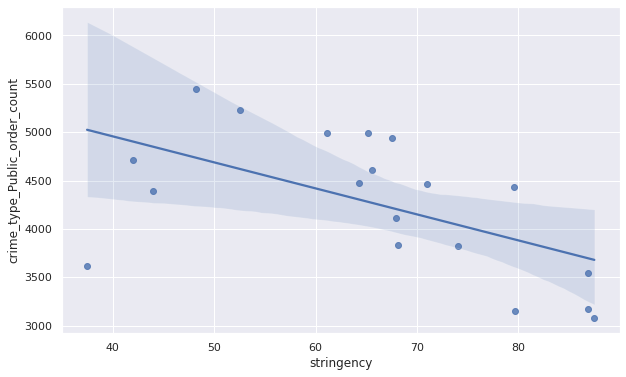

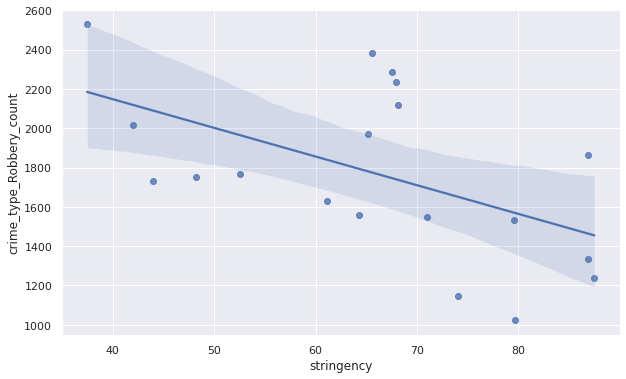

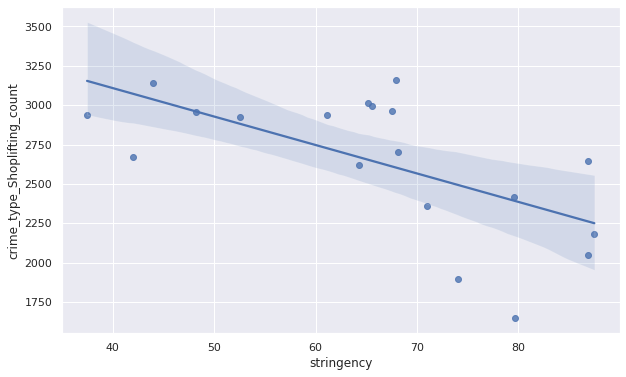

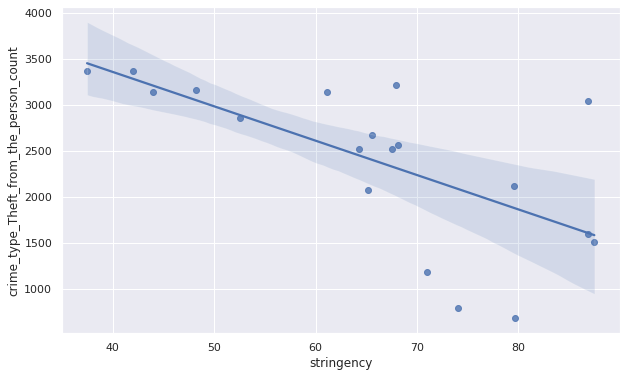

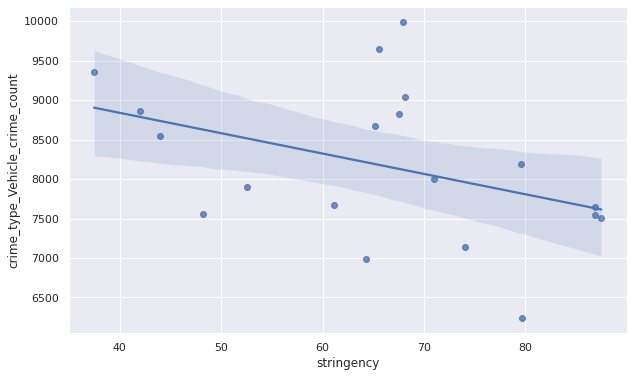

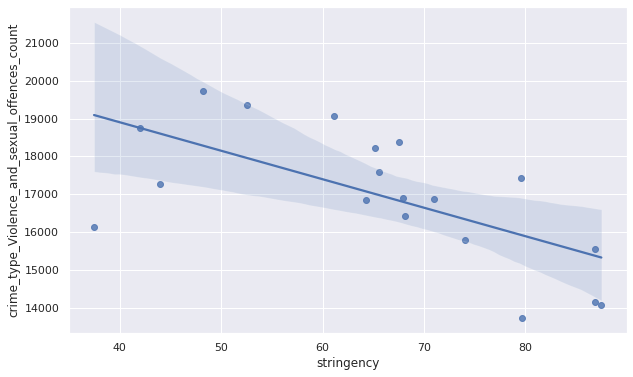

In [231]:
for col in new_columns:
  crime_df = london_pandemic[london_pandemic[f'{col}'] == 1].groupby('month')['stringency'].value_counts().sort_index(level=[1, 0]).to_frame()
  crime_df.rename({'stringency': f'{col}_count'}, axis = 1, inplace = True)
  crime_df.reset_index(level='stringency', inplace = True)
  plt.figure(figsize = (10, 6))
  ax = sns.regplot(data = crime_df, x = crime_df['stringency'], y = crime_df[f'{col}_count'])
  # ax = sns.distplot(feature['stringency'])
  #ax = sns.histplot(feature['stringency'], kde=True)
  #ax.set(xlabel = f'stringency_{col}')

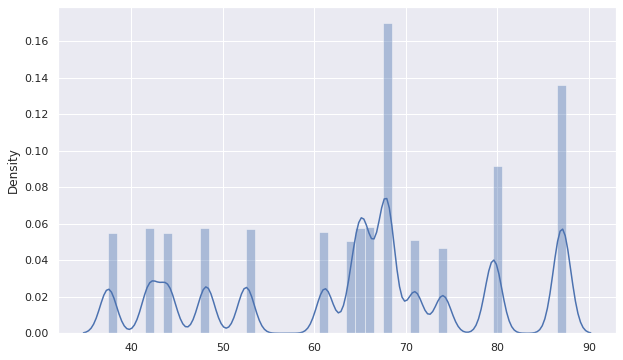

In [227]:
london_pandemic
plt.figure(figsize = (10, 6))
ax = sns.distplot(x = london_pandemic['stringency'])

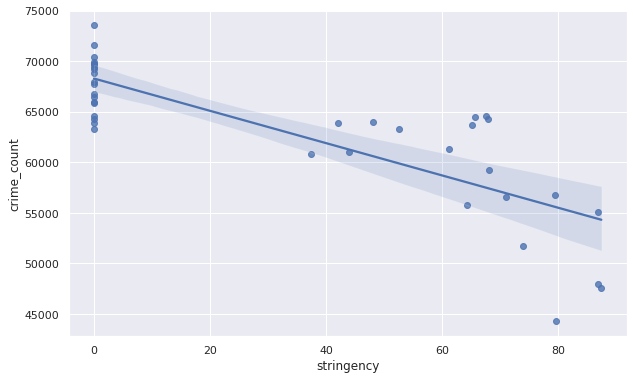

In [238]:
london_balanced_ = data_encoded_dates.groupby('month')['stringency'].value_counts().sort_index(level=[1, 0]).to_frame()
london_balanced_.rename({'stringency': 'crime_count'}, axis = 1, inplace = True)
london_balanced_.reset_index(level='stringency', inplace = True)
plt.figure(figsize = (10, 6))
ax = sns.regplot(data = london_balanced, x = london_balanced['stringency'], y = london_balanced['crime_count'])

In [237]:
data_encoded_dates

,month,stringency,covid,crime_type_Bicycle_theft,crime_type_Burglary,crime_type_Criminal_damage_and_arson,crime_type_Drugs,crime_type_Other_crime,crime_type_Other_theft,crime_type_Possession_of_weapons,crime_type_Public_order,crime_type_Robbery,crime_type_Shoplifting,crime_type_Theft_from_the_person,crime_type_Vehicle_crime,crime_type_Violence_and_sexual_offences
9781,2018-08,0.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9782,2018-08,0.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9783,2018-08,0.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9784,2018-08,0.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9785,2018-08,0.000,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844236,2021-09,42.034,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2844237,2021-09,42.034,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2844238,2021-09,42.034,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2844239,2021-09,42.034,1,0,0,0,0,0,0,0,0,0,0,0,0,1


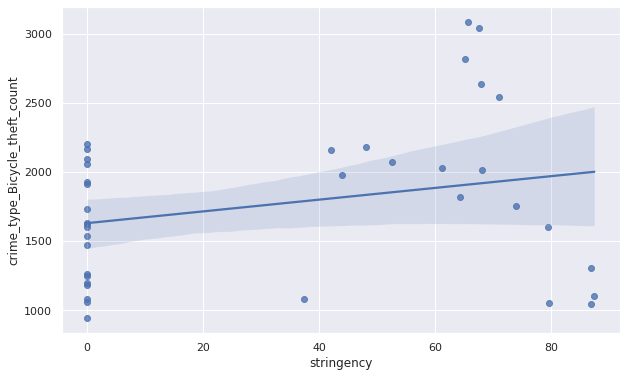

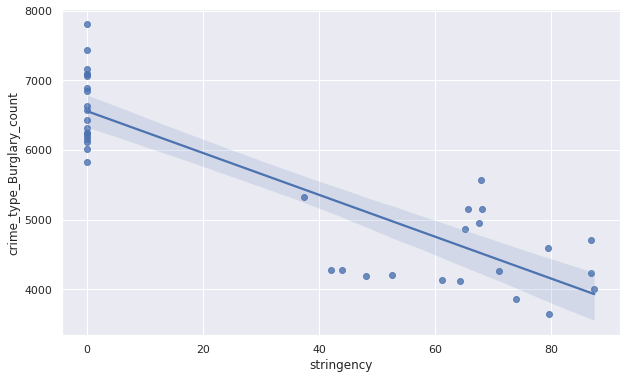

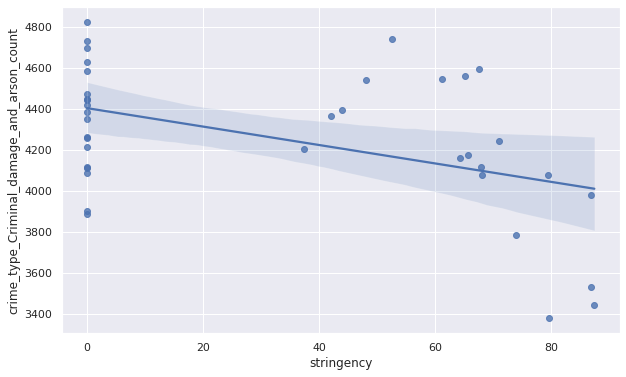

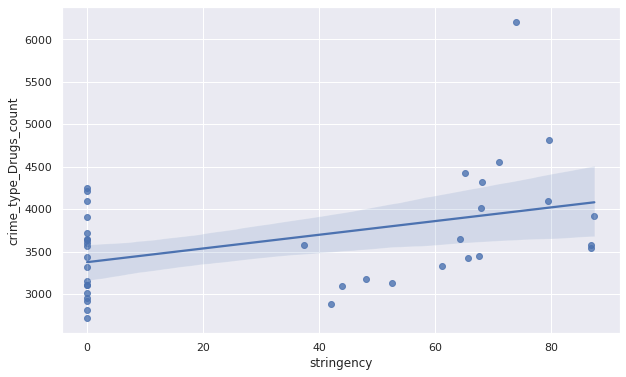

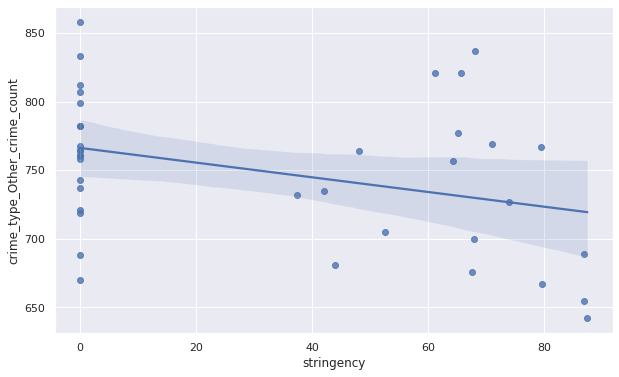

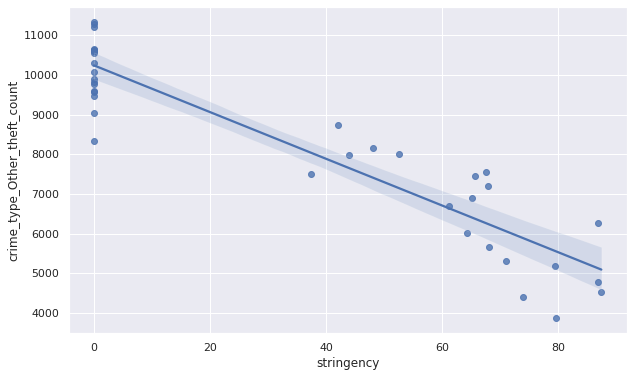

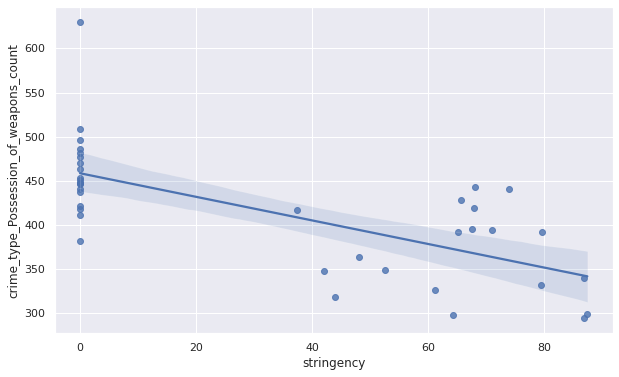

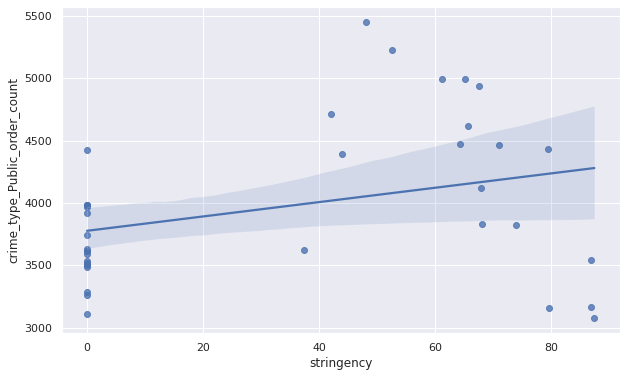

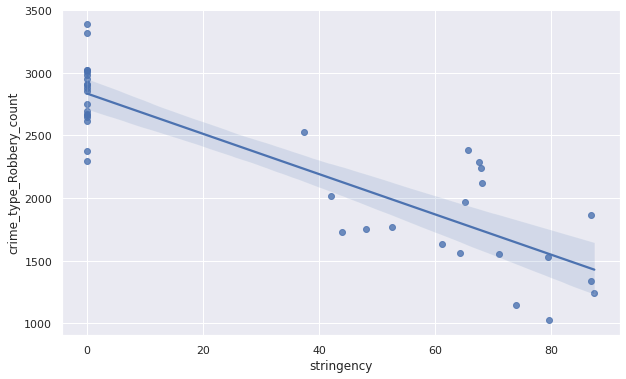

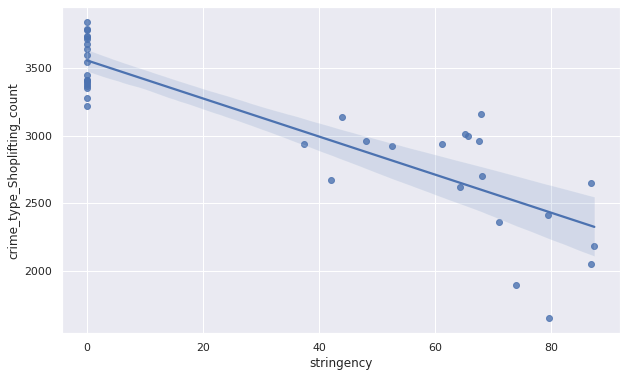

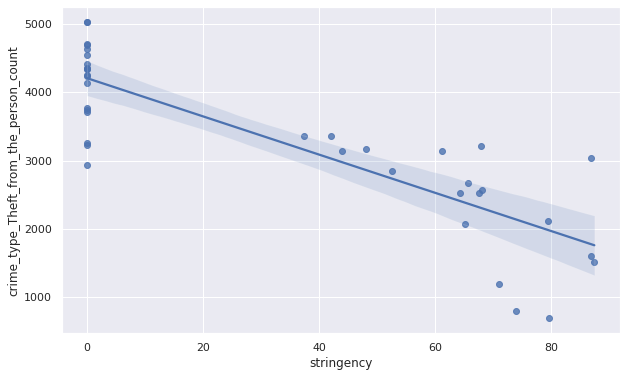

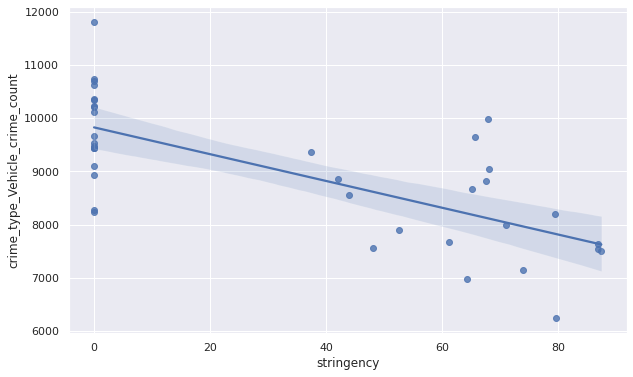

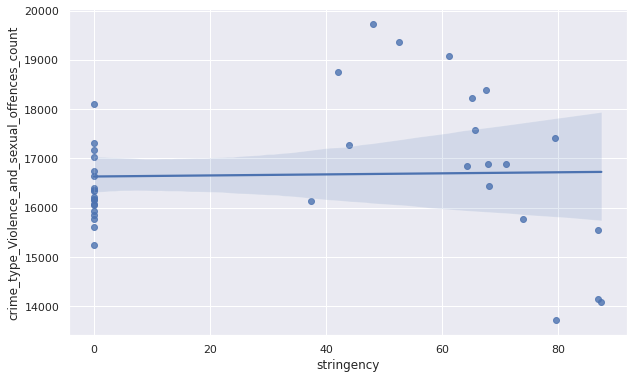

In [239]:
for col in new_columns:
  crime_df = data_encoded_dates[data_encoded_dates[f'{col}'] == 1].groupby('month')['stringency'].value_counts().sort_index(level=[1, 0]).to_frame()
  crime_df.rename({'stringency': f'{col}_count'}, axis = 1, inplace = True)
  crime_df.reset_index(level='stringency', inplace = True)
  plt.figure(figsize = (10, 6))
  ax = sns.regplot(data = crime_df, x = crime_df['stringency'], y = crime_df[f'{col}_count'])